# Edge detection and object segmentation

In this exercise, some techniques for the identification of the edges in an image are explored. In addition, the subsequent steps to arrive to the segmentation of these objects are followed. In this second stage of the exercise, techniques based on image binarization and morphology operators are employed.

# 1. Importing libraries

- numpy. Working with arrays/vectors.
- matplotlib and mpl_toolkits.mplot3d. Plotting.
- skimage and scipy. Image processing.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, filters, feature, morphology
from skimage.morphology import square, disk
from scipy import ndimage as ndi

# 2. Loading and showing the image

The image is shown to identify the objects we want to isolate. In this example, these correspond to the coins in the scene.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


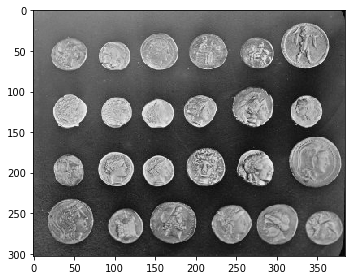

In [2]:
# Loading the image
image = data.coins()
io.imshow(image)
io.show()

# 3. Edge detectors

Operators:

- Sobel.
- Prewitt.
- Canny.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


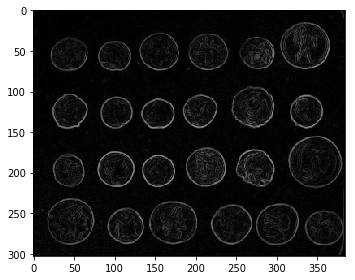

In [3]:
imsobel = filters.sobel(image)
io.imshow(imsobel)
io.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


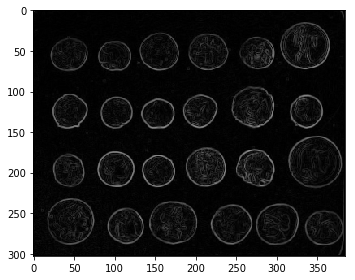

In [4]:
imprewitt = filters.prewitt(image)
io.imshow(imprewitt)
io.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


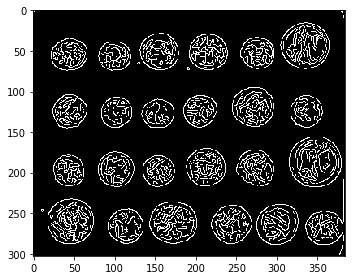

In [5]:
imcanny = feature.canny(image)
io.imshow(imcanny)
io.show()

# 4. Binarization

A binary version of the image (black/white) is obtained by comparing the intensity of every pixel with a threshold value. To this end, different strategies can be used to determine the value of the threshold. Otsu's method is the most common one for image binarization. This is the first step for the segmentation of the objects in the image.

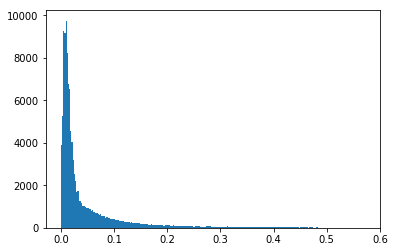

In [6]:
# Setting up th threshold from the image histogram
plt.hist(imprewitt.ravel(), bins=256)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


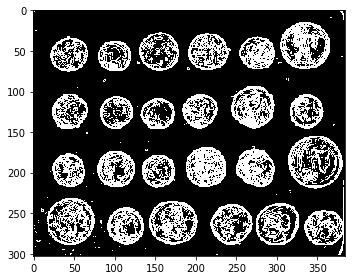

In [7]:
threshold = 0.05
binary_custom = imprewitt > threshold
io.imshow(binary_custom)
io.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


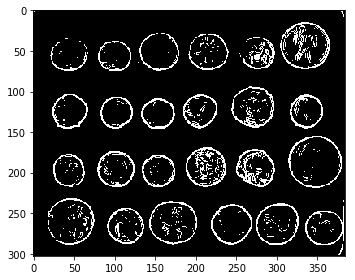

In [8]:
threshold = filters.threshold_otsu(imprewitt)
binary_otsu = imprewitt > threshold
io.imshow(binary_otsu)
io.show()

# 5. Morphology operators

Dilation + erosion operations to mark the areas corresponding to the objects.

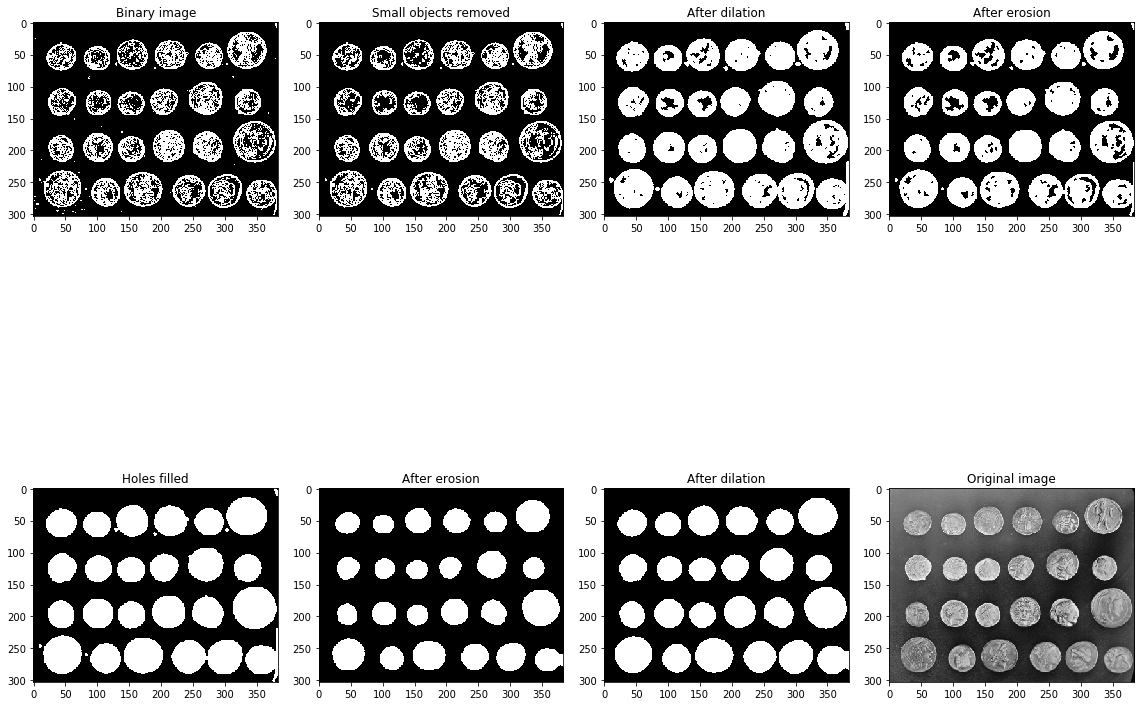

In [9]:
# Dilation and erosion from the binarization based on our threshold

# erosion: growing black; dilation: growing white

im0 = morphology.remove_small_objects(binary_custom, 9)
im1=morphology.dilation(image=im0, selem=disk(2))
im2=morphology.erosion(image=im1, selem=disk(1))
im3 = ndi.binary_fill_holes(im2)
im4 = morphology.erosion(image=im3, selem=disk(5))
im5 = morphology.dilation(image=im4, selem=disk(4))

f, axes = plt.subplots(2, 4, figsize=(16, 16))
axes[0,0].imshow(binary_custom, cmap='gray', aspect='equal')
axes[0,0].set_title('Binary image')
axes[0,1].imshow(im0, cmap='gray', aspect='equal')
axes[0,1].set_title('Small objects removed')
axes[0,2].imshow(im1, cmap='gray', aspect='equal')
axes[0,2].set_title('After dilation')
axes[0,3].imshow(im2, cmap='gray', aspect='equal')
axes[0,3].set_title('After erosion')
axes[1,0].imshow(im3, cmap='gray', aspect='equal')
axes[1,0].set_title('Holes filled')
axes[1,1].imshow(im4, cmap='gray', aspect='equal')
axes[1,1].set_title('After erosion')
axes[1,2].imshow(im5, cmap='gray', aspect='equal')
axes[1,2].set_title('After dilation')
axes[1,3].imshow(image, cmap='gray', aspect='equal')
axes[1,3].set_title('Original image')
plt.tight_layout()
plt.show()

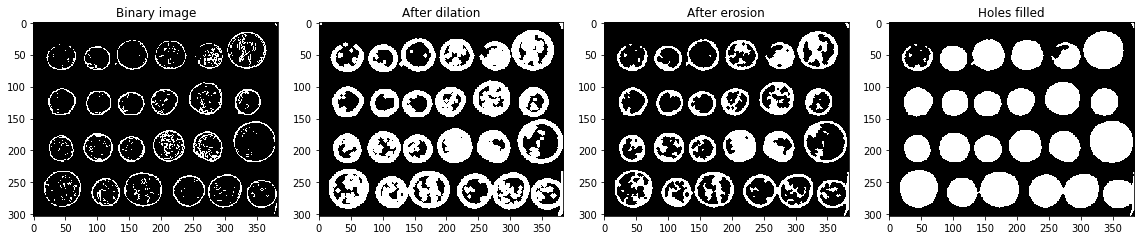

In [10]:
# Dilation and erosion from the binarization using Otsu's method

im1=morphology.dilation(image=binary_otsu, selem=disk(3))
im2=morphology.erosion(image=im1, selem=disk(2))
im3 = ndi.binary_fill_holes(im2)

fotsu, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16, 16))
ax0.imshow(binary_otsu, cmap='gray', aspect='equal')
ax0.set_title('Binary image')
ax1.imshow(im1, cmap='gray', aspect='equal')
ax1.set_title('After dilation')
ax2.imshow(im2, cmap='gray', aspect='equal')
ax2.set_title('After erosion')
ax3.imshow(im3, cmap='gray', aspect='equal')
ax3.set_title('Holes filled')
plt.tight_layout()
plt.show()

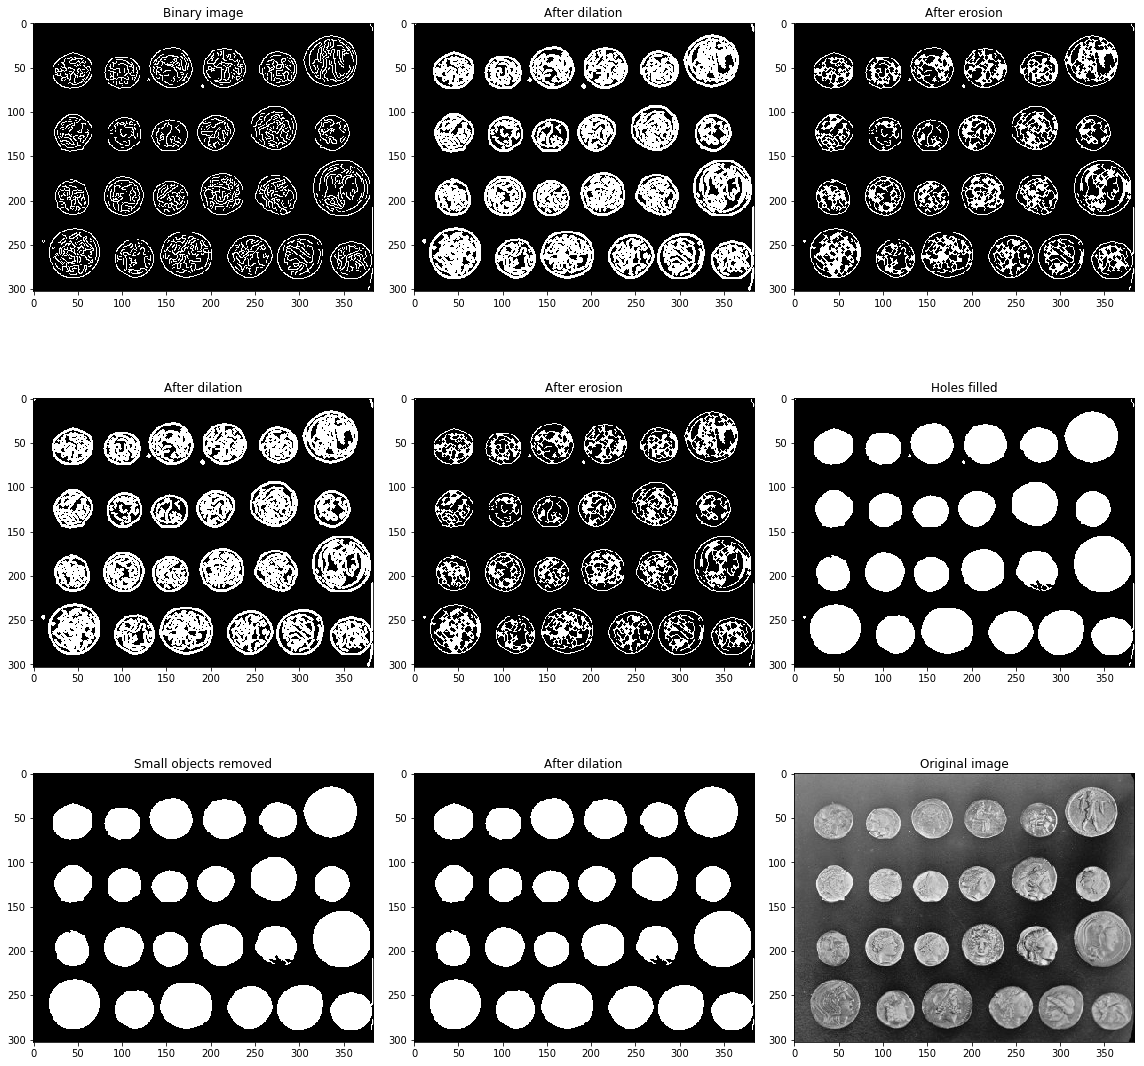

In [11]:
im1=morphology.dilation(image=imcanny, selem=disk(1))
im2=morphology.erosion(image=im1, selem=disk(1))

im3=morphology.dilation(image=im2, selem=disk(1))
im4=morphology.erosion(image=im3, selem=disk(1))

im5 = ndi.binary_fill_holes(im4)

im6 = morphology.remove_small_objects(im5, 16)

im7 = morphology.dilation(image=im6, selem=disk(3))

fcanny, axes = plt.subplots(3, 3, figsize=(16, 16))
axes[0,0].imshow(imcanny, cmap='gray', aspect='equal')
axes[0,0].set_title('Binary image')
axes[0,1].imshow(im1, cmap='gray', aspect='equal')
axes[0,1].set_title('After dilation')
axes[0,2].imshow(im2, cmap='gray', aspect='equal')
axes[0,2].set_title('After erosion')

axes[1,0].imshow(im3, cmap='gray', aspect='equal')
axes[1,0].set_title('After dilation')
axes[1,1].imshow(im4, cmap='gray', aspect='equal')
axes[1,1].set_title('After erosion')
axes[1,2].imshow(im5, cmap='gray', aspect='equal')
axes[1,2].set_title('Holes filled')

axes[2,0].imshow(im6, cmap='gray', aspect='equal')
axes[2,0].set_title('Small objects removed')
axes[2,1].imshow(im6, cmap='gray', aspect='equal')
axes[2,1].set_title('After dilation')
axes[2,2].imshow(image, cmap='gray', aspect='equal')
axes[2,2].set_title('Original image')

plt.tight_layout()
plt.show()
